<a href="https://colab.research.google.com/github/nour614/food-sales-prediction/blob/main/Nour_Tafa_Project_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Nour Tafa



Sales Predictions 


1. Loading Data












2.  Data Cleaning



3.  Exploratory Visuals


4.  Explanatory Visuals

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_salesp = pd.read_csv('/content/sample_data/sales_predictions.csv')


In [ ]:
df_salesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_salesp.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


1) How many rows and columns?



In [ ]:
df_salesp.shape

(8523, 12)

2) What are the datatypes of each variable?



In [ ]:
df_salesp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.



In [ ]:
duplicates = df_salesp.duplicated().sum()
duplicates




0

In [ ]:
df_salesp=df_salesp.drop_duplicates()
df_salesp


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


4) Identify missing values.



In [ ]:
df_salesp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
missing=df_salesp.isna().sum()
missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it!



**replace** the missing numericals with the mean weight (This can introduce bias and is affected by skew and outliers more than the 'median' value)
**replace** the missing categorical outlet size with the('Unknown') its missing 40% of the data( This typically will not create bias in favor of a specific label or class)

In [ ]:
mean_weight=df_salesp['Item_Weight'].mean()
mean_weight

12.857645184135976

In [ ]:
df_salesp['Item_Weight'].fillna(12.85, inplace=True)


In [ ]:
df_salesp['Outlet_Size'].fillna('Unknown', inplace=True)

6) Confirm that there are no missing values after addressing them.



In [ ]:
missing=df_salesp.isna().sum()
missing

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [ ]:
df_salesp.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace= True)

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df_salesp.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,1997.831867,2181.288914
std,4.226125,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
stats=df_salesp.describe()
stats


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,1997.831867,2181.288914
std,4.226125,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histogram to view the distributions of various features in your dataset.


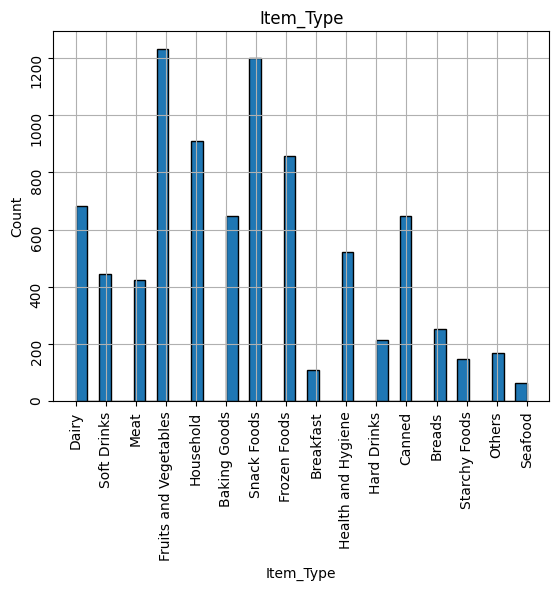

In [ ]:
#Item_Type 
ax = df_salesp['Item_Type'].hist(bins='auto', edgecolor='black')
ax.set_xlabel('Item_Type')
ax.set_ylabel('Count')

ax.set_title('Item_Type')

ax.tick_params(rotation = 90)

Fruits and vegetables , snack food have the highest count. seafood and breakfast have the lowest 

In [ ]:
weight=df_salesp['Item_Type'].describe()
weight

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

Boxplot to view statistical summaries of various features in your dataset.


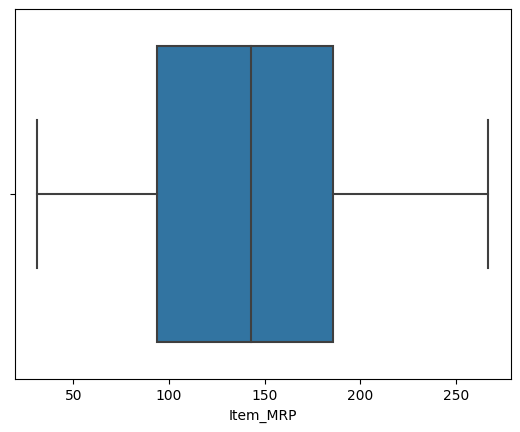

In [ ]:
ax = sns.boxplot(x = 'Item_MRP', data = df_salesp)

This boxplot shows that there arent any outliers.

Heatmap of the correlation between features.

In [ ]:
corr=df_salesp.corr()


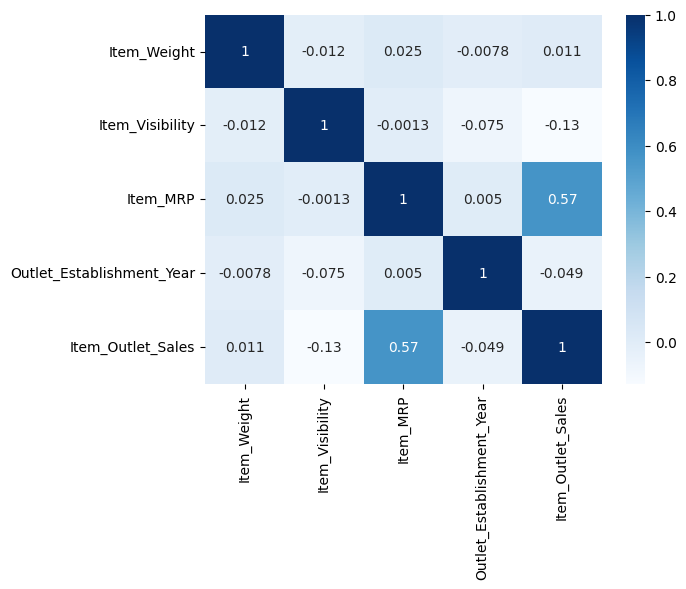

In [ ]:

ax = sns.heatmap(corr, cmap= 'Blues', annot = True)
plt.show()



Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).




Does Item visibility effect Item_Outlet_Sales






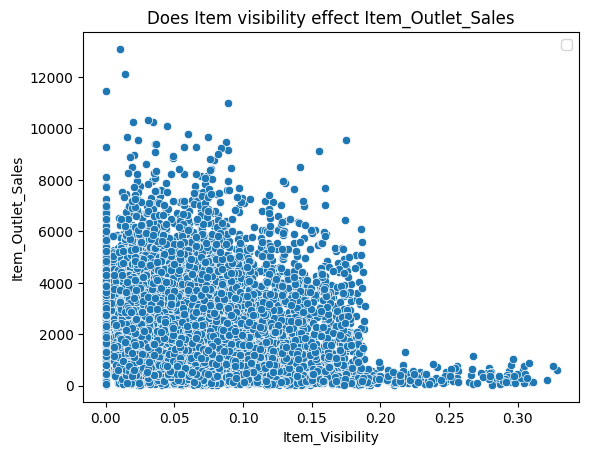

In [ ]:
ax = sns.scatterplot(data=df_salesp, x = 'Item_Visibility', y = 'Item_Outlet_Sales')
ax.set_title('Does Item visibility effect Item_Outlet_Sales')
ax.legend(bbox_to_anchor=[1,1]);

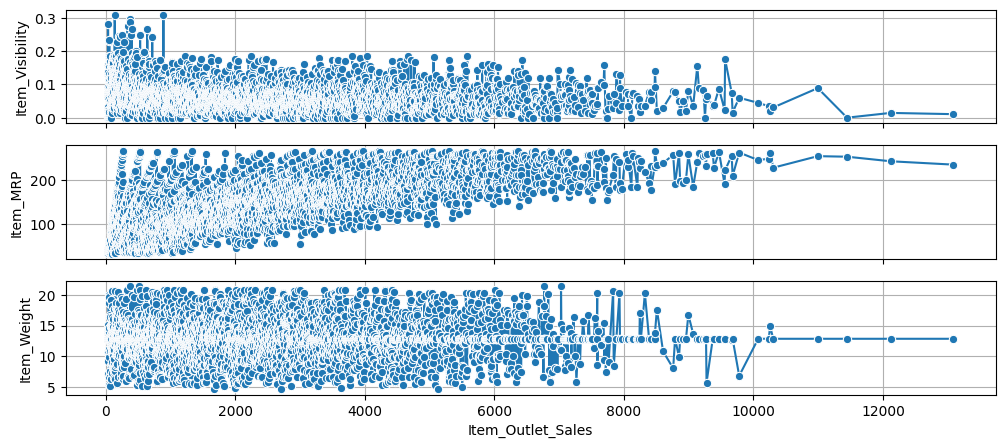

In [ ]:
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)

sns.lineplot(data = df_salesp, x = 'Item_Outlet_Sales', y = 'Item_Visibility', ci = None, marker = 'o', ax = axes[0])

sns.lineplot(data = df_salesp, x = 'Item_Outlet_Sales', y = 'Item_MRP', ci = None, marker = 'o', ax = axes[1])

sns.lineplot(data = df_salesp, x ='Item_Outlet_Sales', y = 'Item_Weight', ci = None, marker = 'o', ax = axes[2])

ax.set_title('Does Item visibility,Item_MRP and Item_Weight effect Item_Outlet_Sales')

#list comprehension
[ax.grid() for ax in axes];

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn import set_config
set_config(display='diagram') 

from IPython.core.display import clear_output

In [ ]:
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [ ]:
df= pd.read_csv('/content/sample_data/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Cleaning Data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace= True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Target Vector and Features

In [ ]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier'])



## Train Test Split (Model Validation).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [ ]:
df['Item_Outlet_Sales'].isna().sum()

0

## 5. Createing a ColumnTransformer for Preprocessing


In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


In [ ]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

# Tuple
num_tuple = (num_pipe, num_selector)

In [ ]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
freq_inputer= SimpleImputer(strategy='most_frequent')
# Pipeline
freq_pipe=make_pipeline(freq_inputer,ohe)
# Selector
cat_selector=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
# Tuple
cat_tuple=(freq_pipe,cat_selector)


In [ ]:
preprocessor = make_column_transformer(num_tuple,cat_tuple,  remainder='drop')

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [ ]:
processed_x = preprocessor.transform(X_test)
processed_t = preprocessor.transform(X_train)

## 1. Linear Regression.




In [ ]:
lin_reg = LinearRegression()


lin_reg_pipe = make_pipeline(preprocessor, lin_reg)


lin_reg_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
train_preds = lin_reg_pipe.predict(X_train)
test_preds = lin_reg_pipe.predict(X_test)
eval_regression(y_train, train_preds, name='Baseline Regression Train')
eval_regression(y_test, test_preds, name='Baseline Regression Test')


Baseline Regression Train Scores
MAE: 847.1280 
MSE: 1,297,558.1834 
RMSE: 1,139.1041 
R2: 0.5616

Baseline Regression Test Scores
MAE: 804.1181 
MSE: 1,194,347.6143 
RMSE: 1,092.8621 
R2: 0.5671



##2. Decision Tree

In [ ]:
d_tree = DecisionTreeRegressor()
d_tree_pipe = make_pipeline(preprocessor, d_tree)
d_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
train_preds_dt = d_tree_pipe.predict(X_train)
test_preds_dt = d_tree_pipe.predict(X_test)

eval_regression(y_train, train_preds_dt, name='Decision Tree Train')
eval_regression(y_test, test_preds_dt, name='Decision Tree Test')

Decision Tree Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Decision Tree Test Scores
MAE: 1,039.4660 
MSE: 2,229,281.3931 
RMSE: 1,493.0778 
R2: 0.1920



In [ ]:
d_tree.get_depth()

40

In [ ]:
depths = list(range(1, 41)) 
scores_dt = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    d_tree1 = DecisionTreeRegressor(max_depth=depth, random_state=42)
    d_tree1_pipe=make_pipeline(preprocessor,d_tree1)
    d_tree1_pipe.fit(X_train, y_train)
    train_scoredt = d_tree1_pipe.score(X_train, y_train)
    test_scoredt = d_tree1_pipe.score(X_test, y_test)
    scores_dt.loc[depth, 'Train Score'] = train_scoredt
    scores_dt.loc[depth, 'Test Score'] = test_scoredt   
scores_dt.head()

,Test Score,Train Score
1,0.229683,0.237797
2,0.433778,0.431641
3,0.524222,0.524218
4,0.584005,0.582625
5,0.59471,0.60394


In [ ]:
train_scoredt = d_tree1_pipe.score(X_train, y_train)
test_scoredt = d_tree1_pipe.score(X_test, y_test)
print(train_scoredt)
print(test_scoredt)

1.0
0.18409072273251326


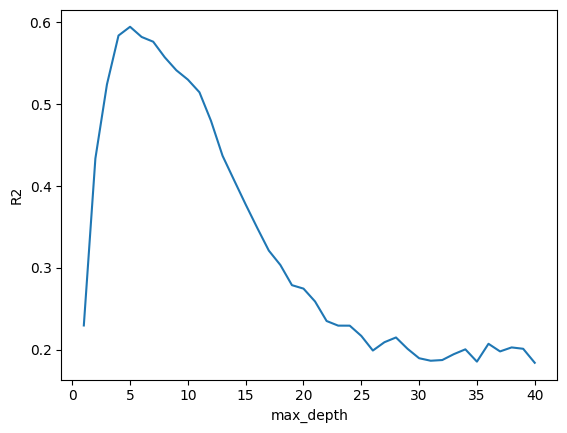

In [ ]:
plt.plot(depths, scores_dt['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

## Tuning the Desicion Tree Model

In [ ]:
d_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
d_tree.get_depth()

40

In [ ]:
d_tree.get_n_leaves()

6275

In [ ]:
d_tree_tuned = DecisionTreeRegressor(max_depth = 5, random_state = 42)
d_tree_tuned_pipe = make_pipeline(preprocessor,d_tree_tuned)
d_tree_tuned_pipe.fit(X_train, y_train)
train_score_tuned = d_tree_tuned_pipe.score(X_train, y_train)
test_score_tuned = d_tree_tuned_pipe.score(X_test, y_test)
print(train_score_tuned)
print(test_score_tuned)

0.6039397477322956
0.5947099753159972


In [72]:
train_preds_dt2= d_tree_tuned_pipe.predict(X_train)
test_preds_dt2= d_tree_tuned_pipe.predict(X_test)


In [78]:
eval_regression(y_train, train_preds_dt2, name='Tuned Decision Tree Train')
eval_regression(y_test, test_preds_dt2, name='Tuned Decision  Tree Test')

Tuned Decision Tree Train Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Tuned Decision  Tree Test Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



##3. Bagging Tree Model

In [ ]:
bag_tree = BaggingRegressor()

bag_tree_pipe = make_pipeline(preprocessor, bag_tree)

bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
train_predsbt = bag_tree_pipe.predict(X_train)
test_predsbt = bag_tree_pipe.predict(X_test)

eval_regression(y_train, train_predsbt, name='Bagged Tree Train')
eval_regression(y_test, test_predsbt, name='Bagged Tree Test')

Bagged Tree Train Scores
MAE: 320.0105 
MSE: 238,014.7260 
RMSE: 487.8675 
R2: 0.9196

Bagged Tree Test Scores
MAE: 797.2335 
MSE: 1,328,901.9767 
RMSE: 1,152.7801 
R2: 0.5183



In [ ]:
bag_tree = BaggingRegressor(random_state = 42)
bag_tree.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bag_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
bag_tree_train_score = bag_tree_pipe.score(X_train, y_train)
bag_tree_test_score = bag_tree_pipe.score(X_test, y_test)
print(bag_tree_train_score)
print(bag_tree_test_score)

0.9191729946689331
0.5147356496977951


In [ ]:
estimators = [10, 20, 30, 40, 50, 100]
scoresbt = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_tree = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_tree_pipe.fit(X_train, y_train)
   train_scorebt = bag_tree_pipe.score(X_train, y_train)
   test_scorebt = bag_tree_pipe.score(X_test, y_test)
   scoresbt.loc[num_estimators, 'Train Score'] = train_scorebt
   scoresbt.loc[num_estimators, 'Test Score'] = test_scorebt

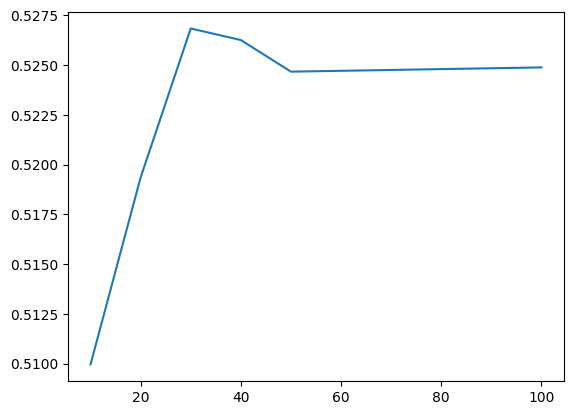

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(scoresbt['Test Score'])
plt.show()
plt.suptitle('Bagging Tree Scores');

## Tuning the Bagging Tree Model

In [ ]:
scoresbt = scoresbt.sort_values(by='Test Score', ascending=False)
scoresbt

,Train Score,Test Score
30,0.91537,0.526844
40,0.919779,0.526264
100,0.914438,0.524888
50,0.917083,0.524675
20,0.916099,0.51936
10,0.917405,0.509965


In [ ]:
best_test = scoresbt.index[0]
bt_tuned = BaggingRegressor(n_estimators=best_test,)
bt_tuned_pipe= make_pipeline(preprocessor, bt_tuned)
bt_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d0de0ca90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('baggingregressor', BaggingRegressor(n_estimators=30))])

In [77]:
train_predsbt_tuned = bt_tuned_pipe.predict(X_train)
test_predsbt_tuned = bt_tuned_pipe.predict(X_test)

eval_regression(y_train, train_predsbt_tuned, name='Tuned Bagged Tree Train')
eval_regression(y_test,test_predsbt_tuned, name='Tuned Bagged Tree Test')

Tuned Bagged Tree Train Scores
MAE: 304.5918 
MSE: 197,628.2722 
RMSE: 444.5540 
R2: 0.9332

Tuned Bagged Tree Test Scores
MAE: 778.9824 
MSE: 1,266,195.7785 
RMSE: 1,125.2537 
R2: 0.5411



In [ ]:
print(bt_tuned_pipe.score(X_train, y_train))
print(bt_tuned_pipe.score(X_test, y_test))

0.9332214123494779
0.5410633555868587


3. Overall, which model do you recommend?
Justify your recommendation.

From the results the Tuned Bagging Tree has higher r2 score which gives us a closer prediciton 